In [326]:
# https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil?select=amazon.csv

In [327]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [328]:
data = pd.read_csv('amazon.csv',encoding= "iso-8859-1",parse_dates = ['date'])

In [329]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

## 1. Display Top 5 Rows of The Dataset

In [331]:
data.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


## 2. Check Last 5 Rows

In [333]:
data.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


## 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [335]:
data.shape

(6454, 5)

## 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement


In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


## 5. Check For Duplicate Data and Drop Them

In [339]:
data.duplicated().any()

True

In [340]:
data = data.drop_duplicates()

In [341]:
data.duplicated().sum()

0

## 6. Check Null Values In The Dataset

In [343]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

## 7. Get Overall Statistics About The Dataframe

In [345]:
data.describe(include = "all")

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


## 8. Rename Month Names To English

In [347]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [348]:
data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [349]:
month_translation = {
    'Janeiro': 'January', 'Fevereiro': 'February', 'Março': 'March',
    'Abril': 'April', 'Maio': 'May', 'Junho': 'June',
    'Julho': 'July', 'Agosto': 'August', 'Setembro': 'September',
    'Outubro': 'October', 'Novembro': 'November', 'Dezembro': 'December'}
data['month']= data['month'].map(month_translation)

In [350]:
data['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

## 9. Total Number of Fires Registered

In [352]:
data.head(2)

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01


In [353]:
data['number'].sum()

698811.073

## 10. In Which Month Maximum Number of Forest Fires Were Reported?

Text(0, 0.5, 'Number of Forest Fires')

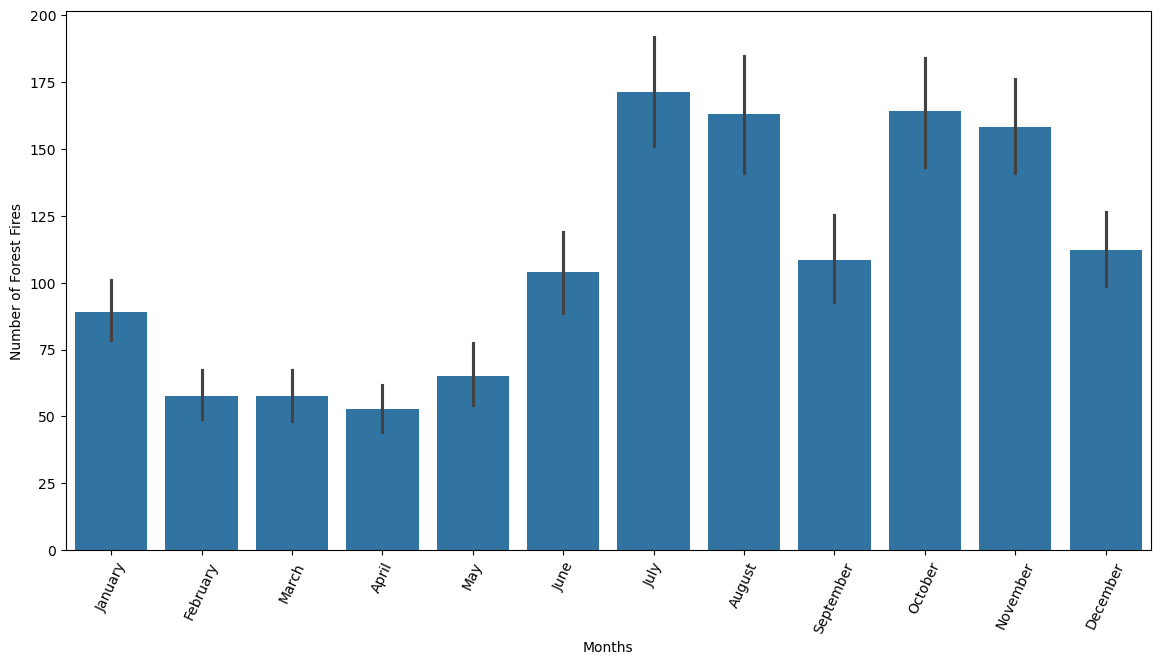

In [355]:
plt.figure(figsize=(14,7))
sns.barplot(x='month', y='number',data = data)
plt.xticks(rotation = 65)
plt.xlabel("Months")
plt.ylabel("Number of Forest Fires")

In [356]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [357]:
data.groupby('month')['number'].sum().reset_index()

,month,number
0,April,28184.770
1,August,88050.435
2,December,57535.480
3,February,30839.050
4,January,47681.844
5,July,92319.113
6,June,55997.675
7,March,30709.405
8,May,34725.363
9,November,85508.054


## 11. In Which Year Maximum Number of Forest Fires Was Reported?

In [359]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [360]:
max_fires_year = data.groupby("year")['number'].sum().idxmax()

In [361]:
max_fires_year

2003

In [362]:
max_fires = data.groupby("year")['number'].sum().max()

In [363]:
max_fires

42760.674

Text(0, 0.5, 'Number of Forest Fires')

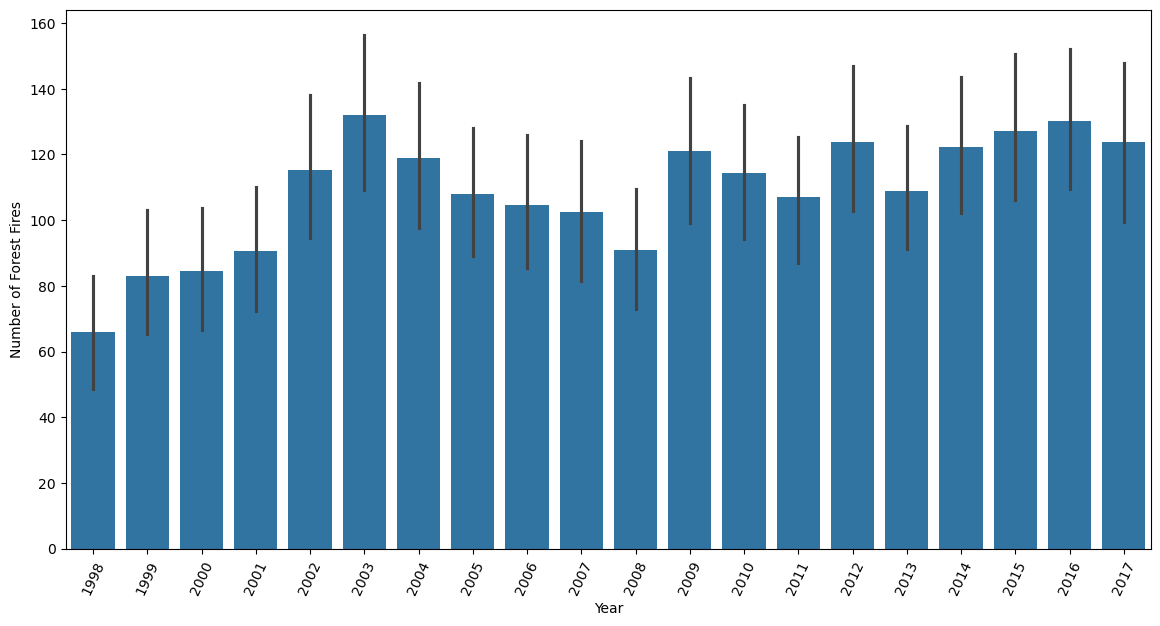

In [364]:
plt.figure(figsize=(14,7))
sns.barplot(x='year', y='number',data = data)
plt.xticks(rotation = 65)
plt.xlabel("Year")
plt.ylabel("Number of Forest Fires")

## 12. In Which State Maximum Number of Forest Fires Was Reported?

Text(0.5, 1.0, 'Forest Fires Reported Per State')

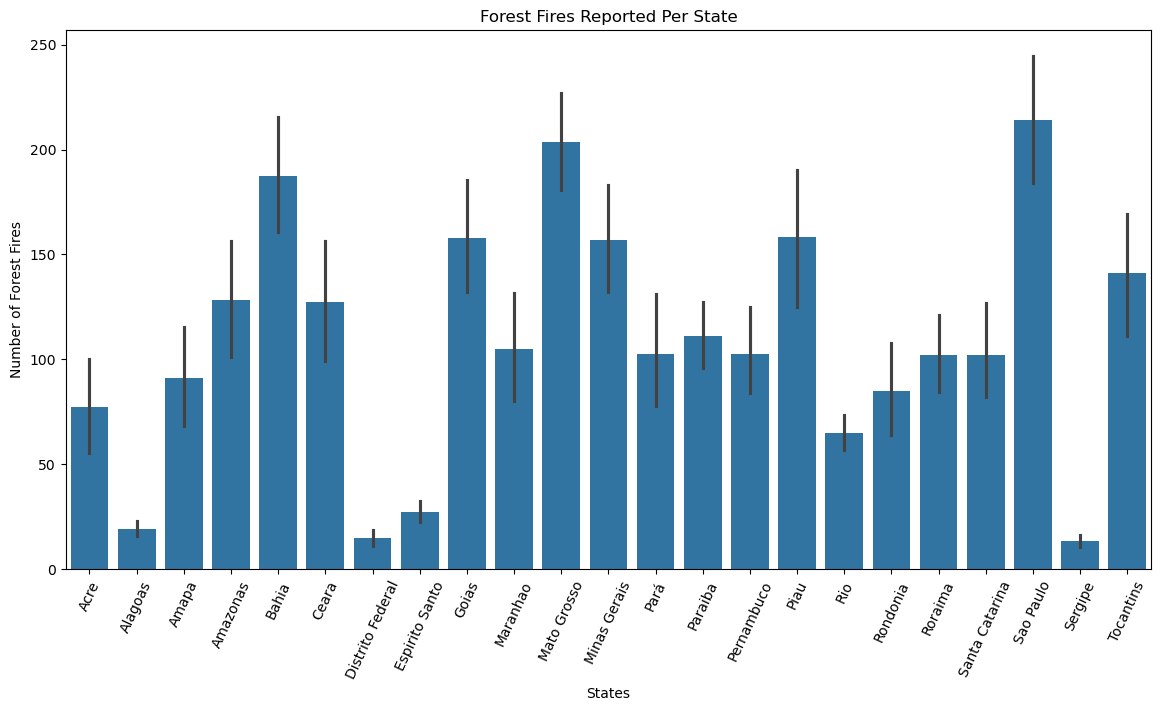

In [366]:
plt.figure(figsize=(14,7))
sns.barplot(x='state',y='number',data=data)
plt.xticks(rotation = 65)
plt.xlabel("States")
plt.ylabel("Number of Forest Fires")
plt.title("Forest Fires Reported Per State")

In [367]:
data2 = data.groupby('state')['number'].sum().reset_index()

In [368]:
data2

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


## 13. Find Total Number of Fires Were Reported In Amazonas


In [370]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [371]:
data['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [372]:
data[data['state'] == 'Amazonas']['number'].sum()

30650.129

## 14. Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [374]:
data0 = data[data['state'] == 'Amazonas']

In [375]:
data6 = data0.groupby('year')['number'].sum().reset_index()

In [376]:
data6

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


Text(0, 0.5, 'Number of Forest Fires')

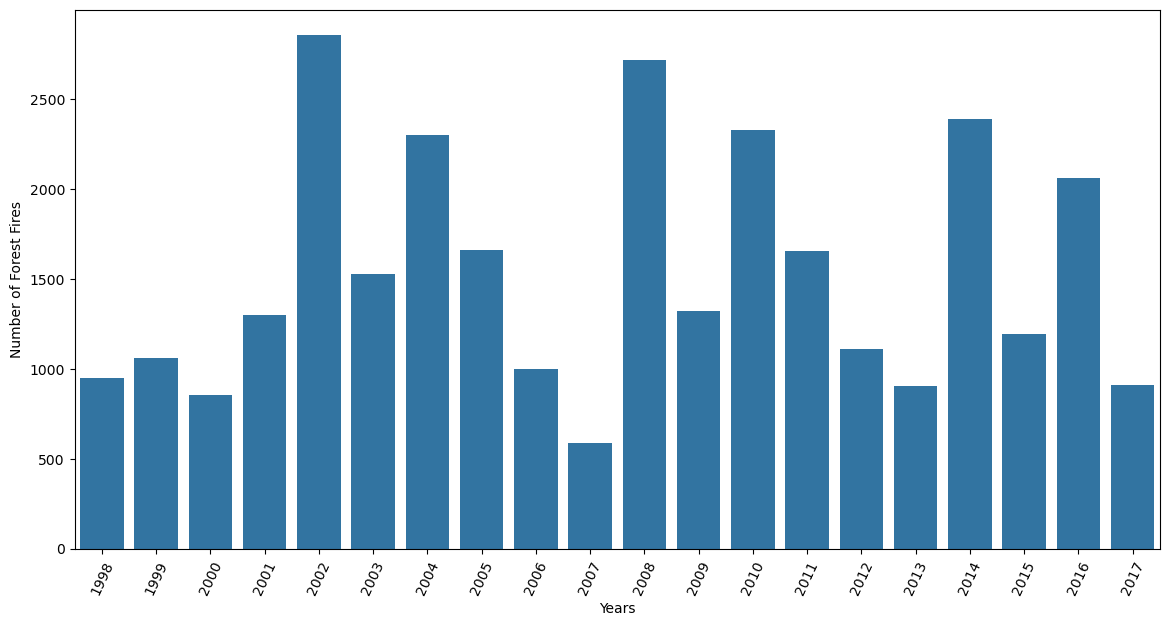

In [377]:
plt.figure(figsize=(14,7))
sns.barplot(x="year",y="number",data=data6)
plt.xticks(rotation = 65)
plt.xlabel("Years")
plt.ylabel("Number of Forest Fires")

## 15. Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [379]:
amazonas_fires = data[data['state'] == 'Amazonas']
amazonas_daily_fires = amazonas_fires.groupby('date')['number'].sum().reset_index()
print(amazonas_daily_fires)

         date    number
0  1998-01-01   946.000
1  1999-01-01  1061.000
2  2000-01-01   853.000
3  2001-01-01  1297.000
4  2002-01-01  2852.000
5  2003-01-01  1524.268
6  2004-01-01  2298.207
7  2005-01-01  1657.128
8  2006-01-01   997.640
9  2007-01-01   589.601
10 2008-01-01  2717.000
11 2009-01-01  1320.601
12 2010-01-01  2324.508
13 2011-01-01  1652.538
14 2012-01-01  1110.641
15 2013-01-01   905.217
16 2014-01-01  2385.909
17 2015-01-01  1189.994
18 2016-01-01  2060.972
19 2017-01-01   906.905


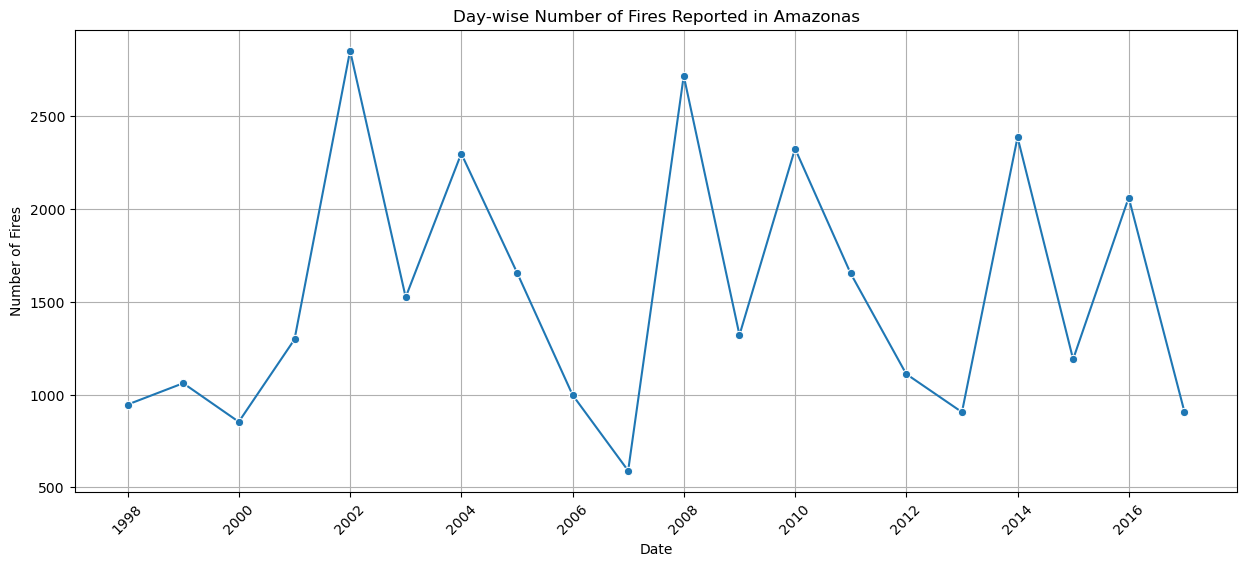

In [380]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='number', data=amazonas_daily_fires, marker='o')

plt.xlabel('Date')
plt.ylabel('Number of Fires')
plt.title('Day-wise Number of Fires Reported in Amazonas')
plt.xticks(rotation=45) 
plt.grid(True)

## 16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [382]:
data_2015 = data[data['year'] == 2015].groupby('month')['number'].sum().reset_index()

In [383]:
data_2015

,month,number
0,April,2573.000
1,August,4363.125
2,December,4088.522
3,February,2309.000
4,January,4635.000
5,July,4364.392
6,June,3260.552
7,March,2202.000
8,May,2384.000
9,November,4034.518


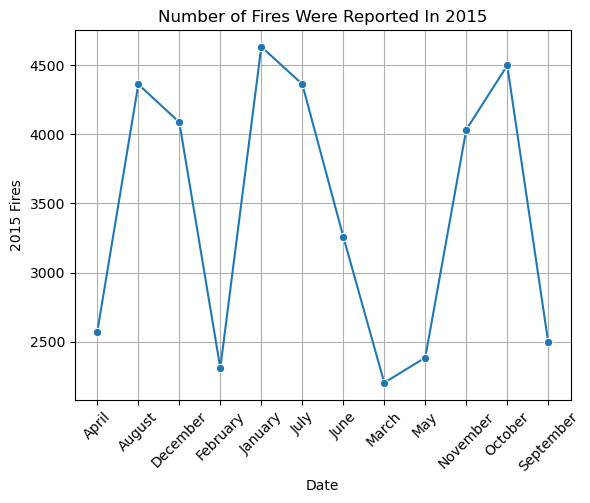

In [384]:
sns.lineplot(x='month', y='number', data=data_2015, marker='o')

plt.xlabel('Date')
plt.ylabel('2015 Fires')
plt.title('Number of Fires Were Reported In 2015')
plt.xticks(rotation=45) 
plt.grid(True)

## 17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [386]:
avg_fire = (data.groupby('state')['number'].mean()).sort_values(ascending=False).reset_index()

C:\Users\Okelion\AppData\Local\Temp\ipykernel_1892\2573218904.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='number', data=avg_fire, palette='Reds_r')


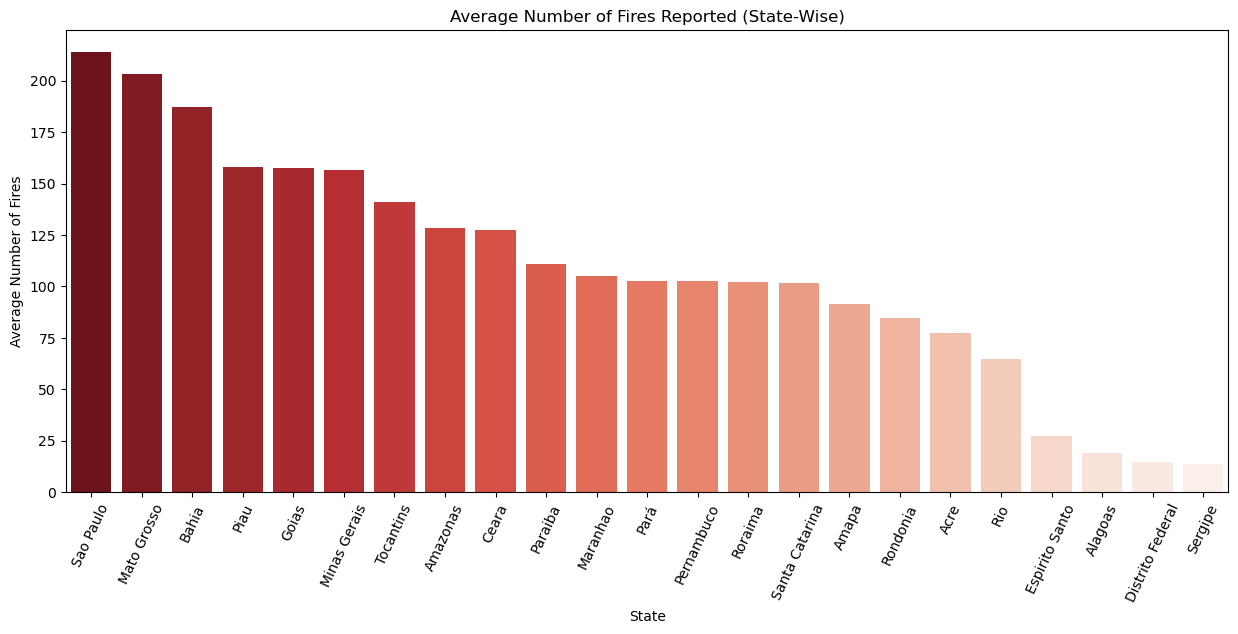

In [387]:
plt.figure(figsize=(15, 6))
sns.barplot(x='state', y='number', data=avg_fire, palette='Reds_r')

plt.xlabel('State')
plt.ylabel('Average Number of Fires')
plt.title('Average Number of Fires Reported (State-Wise)')
plt.xticks(rotation=65)
plt.show()

## 18.  To Find The State Names Where Fires Were Reported In 'dec' Month


In [236]:
data['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [246]:
data[data['month'] == 'December'] ['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)